# 통계분석 과제 (ANOVA)
## One -Way ANOVA 
- titanic 데이터에서 class에 따른 평균 fare의 차이가 있는지를 검정하세요 


In [1]:
import pandas as pd 
df_t = pd.read_csv('./data/titanic.csv')

In [2]:
df_t

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,True,Southampton
887,1,1,female,19.0,0,0,30.0000,S,First,False,Southampton
888,0,3,female,NaN,1,2,23.4500,S,Third,False,Southampton
889,1,1,male,26.0,0,0,30.0000,C,First,True,Cherbourg


In [3]:
# 정보 확인하기
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB


In [8]:
df_t['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [10]:
df_t['class'].unique()

array(['Third', 'First', 'Second'], dtype=object)

In [9]:
df_t['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

### class별 검정 시행하기

In [13]:
# 클래스별로 나누기
First = df_t[df_t['class']=='First']['fare']
Second = df_t[df_t['class']=='Second']['fare']
Third = df_t[df_t['class']=='Third']['fare']

In [16]:
# 정규성 검정 시행하기
import scipy.stats as stats
print(stats.shapiro(First))
print(stats.shapiro(Second))
print(stats.shapiro(Third))

ShapiroResult(statistic=0.7184011936187744, pvalue=7.556290242780962e-19)
ShapiroResult(statistic=0.7785054445266724, pvalue=2.1134194129582328e-15)
ShapiroResult(statistic=0.6183854341506958, pvalue=1.599492812175185e-31)


#### 결과 해석
__귀무가설__ : 정규성을 만족한다. 
-  세 집단 모두 p-value값이 유의수준(0.05)보다 작으므로 귀무가설을 기각한다.
- 즉, 세 집단은 모두 정규성을 만족하지 않는다.
- 따라서 kruskal을 활용한 일원배치 분산분석을 실시한다.

In [17]:
# kruskal 검정 시행(정규성을 만족하지 않기 때문)
# 귀무가설 : 세 집단의 평균은 모두 같다. 
# 대립가설 : 적어도 한 집단 이상의 평균은 같지 않다. 
stats.kruskal(First, Second, Third)

KruskalResult(statistic=438.0437034212556, pvalue=7.586096900646798e-96)

#### 결과 해석
- p-value값이 유의수준(0.05)보다 작으므로 귀무가설을 기각한다. 
- 즉, 적어도 하나 이상의 집단의 평균은 차이가 있다.(유의미한 차이)


## Two -Way ANOVA 
- titanic 데이터에서 class와 sex에 따른 fare의 차이를 검정하세요. 
- 1. 교호작용효과 검정 
- 2. class효과 검정 
- 3. sex 효과 검정 

In [20]:
## 독립변수 class, sex와 종속변수 fare를 Series로 변경
x_class = df_t['class']
x_sex = df_t['sex']
y_fare = df_t['fare']
print(type(x_class), type(x_sex))

## class, sex, fare 변수들로만 구성된 분석용 데이터셋 생성
df_t = df_t[['class', 'sex', 'fare']]

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [21]:
df_t

,class,sex,fare
0,Third,male,7.2500
1,First,female,71.2833
2,Third,female,7.9250
3,First,female,53.1000
4,Third,male,8.0500
...,...,...,...
886,Second,male,13.0000
887,First,female,30.0000
888,Third,female,23.4500
889,First,male,30.0000


<b>2. 분산분석 수행</b>

In [25]:
# 분산분석 수행
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formular = 'y_fare ~ C(x_class)*C(x_sex)'
model = ols(formular, df_t).fit()
anova_table = anova_lm(model, typ=2)

In [26]:
anova_table

,sum_sq,df,F,PR(>F)
C(x_class),7.347122e+05,2.0,242.620968,9.763645e-85
C(x_sex),3.174857e+04,1.0,20.968394,5.337586e-06
C(x_class):C(x_sex),5.002816e+04,2.0,16.520591,9.034206e-08
Residual,1.339992e+06,885.0,NaN,NaN


#### 결과 해석
1. 상호작용 분석(귀무가설 : 상호작용(교호작용)이 있다.)
   - p-value값이 유의수준(0.05)보다 작으므로 귀무가설을 기각한다. 
   - 즉, 두 집단 간 상호작용(교호작용)이 없다. 
2. x_class 결과
   - p-value값이 유의수준(0.05)보다 작으므로 class별로 요금 차이가 유의하다. 
3. x_sex 결과
   - p-value값이 유의수준(0.05)보다 작으므로 성별에 따른 요금 차이가 유의하다. 

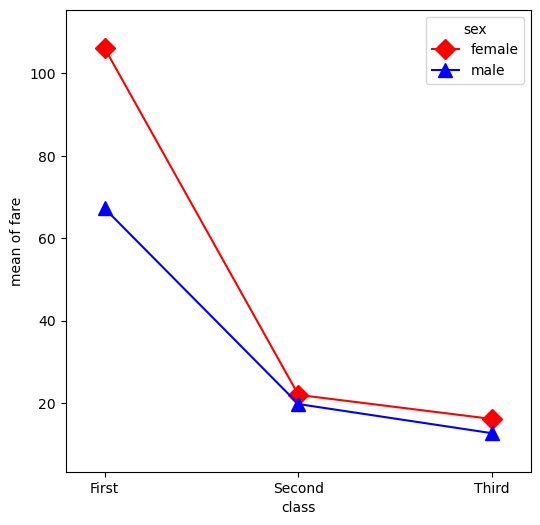

In [32]:
# 교호작용 시각화 확인
# 그래프에서 교차점이 없으므로 교호작용이 없다는 것을 알 수 있음.
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt 
%matplotlib inline

fig, ax = plt.subplots(figsize=(6,6))
fig = interaction_plot(x_class, x_sex, y_fare, colors=['red','blue'], markers=['D','^'], ms=10, ax=ax)
plt.show()